# Import Dependencies and Credentials

In [1]:
#Import dependencies and credentials

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder


In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import and_

In [3]:
# Insert your own credentials

SPOTIPY_CLIENT_ID='a28754520fdd4588a47635b2d27dd788'
SPOTIPY_CLIENT_SECRET='1cbb17efcf8042e893654c2c3146fde3'
#SPOTIPY_REDIRECT_URI='your-app-redirect-url'


In [4]:
# 

auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [5]:
# Spotify object and will be used whenever you are connecting to a spotify serivce 

sp.me


<bound method Spotify.me of <spotipy.client.Spotify object at 0x000001DEB24E1790>>

# Album Info

In [6]:
# Return all the albumbs that begin with "positions" // we can change this 

albums = sp.search(q='album:'+'positions',type ='album', limit = 20)
albums

{'albums': {'href': 'https://api.spotify.com/v1/search?query=album%3Apositions&type=album&offset=0&limit=20',
  'items': [{'album_group': 'album',
    'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
      'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR',
      'id': '66CXWjxzNUsdJxJ2JdwvnR',
      'name': 'Ariana Grande',
      'type': 'artist',
      'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
   

In [7]:
# Now we are going to store the album info we got from the spotify api
# This will give us a readable list 

albums_list = albums['albums']['items']
if len(albums_list) > 0:
    for album in albums_list:
        print(album['name'] + " - By - " + album['artists'][0]['name'])
        print("Album ID: " + album['id'] + " / Artist ID - " + album['artists'][0]['id'])
        print("------")
        

Positions - By - Ariana Grande
Album ID: 3euz4vS7ezKGnNSwgyvKcd / Artist ID - 66CXWjxzNUsdJxJ2JdwvnR
------
Positions (Deluxe) - By - Ariana Grande
Album ID: 74vajFwEwXJ61OW1DKSPEa / Artist ID - 66CXWjxzNUsdJxJ2JdwvnR
------
Positions - By - Ariana Grande
Album ID: 3BSzygCIET0gzTTIs7iB3y / Artist ID - 66CXWjxzNUsdJxJ2JdwvnR
------
Various Positions - By - Leonard Cohen
Album ID: 6I58qJMqZHhb8jtNT3CuJB / Artist ID - 5l8VQNuIg0turYE1VtM9zV
------
Positions (Deluxe) - By - Ariana Grande
Album ID: 3WSg3hc6uZ7AYZBvtsg2GU / Artist ID - 66CXWjxzNUsdJxJ2JdwvnR
------
Positions - By - YTMIXEDIT
Album ID: 4vLqqssJ9grMGFw2XZhQZM / Artist ID - 0ke2lKeGy1ERAhWoRyTCXo
------
The Positions - By - Gang of Youths
Album ID: 22O48ndcQUFyzk7Kpwqw6n / Artist ID - 142YBUGmLWCJigFLzgguf8
------
Positions - By - Rain Paris
Album ID: 5MQ9BgXdY6Cjg2q4lHAXp6 / Artist ID - 10TCOjSPs9ywBN1Q083BnB
------
positions - By - Jeremy Green
Album ID: 6lPXE1eTFCv5u219RkAoW6 / Artist ID - 32jiRxDN9Nb9QbXh88uo42
------
posit

# Artist Info

In [8]:
# To get a list of albumns by an artist, you will need to know the Artist ID // This is Ariana Grande's ID

artist_id = '66CXWjxzNUsdJxJ2JdwvnR'


In [9]:
# Here is a list of 20 albums by Ariana Grande... as you see ther

artist_uri = 'spotify:artist:' + artist_id
results = sp.artist_albums(artist_uri, album_type = 'album', limit = 20)
albums = results['items']
while results['next']:
     results = sp.next(results)
     albums.extend(results['items'])

print(len(albums))
albums[0]
albums[0]['artists'][0]['name']
for album in albums:
     print(album['name'] + " (Singer: " + album['artists'][0]['name'] + " )")

29
Positions (Deluxe) (Singer: Ariana Grande )
Positions (Deluxe) (Singer: Ariana Grande )
Positions (Singer: Ariana Grande )
Positions (Singer: Ariana Grande )
k bye for now (swt live) (Singer: Ariana Grande )
thank u, next (Singer: Ariana Grande )
Sweetener (Singer: Ariana Grande )
Sweetener (Singer: Ariana Grande )
thank u, next (Singer: Ariana Grande )
Christmas & Chill (Japan Version) (Singer: Ariana Grande )
Dangerous Woman (Singer: Ariana Grande )
Dangerous Woman (Singer: Ariana Grande )
Dangerous Woman (Singer: Ariana Grande )
Dangerous Woman (Edited) (Singer: Ariana Grande )
Dangerous Woman (Singer: Ariana Grande )
Dangerous Woman (Singer: Ariana Grande )
Dangerous Woman (Singer: Ariana Grande )
My Everything (Italian Edition) (Singer: Ariana Grande )
The Remix (Singer: Ariana Grande )
My Everything (Deluxe) (Singer: Ariana Grande )
My Everything (Singer: Ariana Grande )
My Everything (Singer: Ariana Grande )
My Everything (Deluxe) (Singer: Ariana Grande )
My Everything (Singe

In [10]:
artist_uri = 'spotify:artist:' + artist_id
results = sp.artist_albums(artist_uri, album_type='album', limit=20)
albums = results['items']
# while results['next']:
#     results = sp.next(results)
#     albums.extend(results['items'])

print(len(albums))
albums[0]
albums[0]['artists'][0]['name']
#for album in albums:
print(album['name'] + " (Singer: " + album['artists'][0]['name'] + " )")

20
Yours Truly (Singer: Ariana Grande )


In [11]:
artist_uri = 'spotify:artist:' + artist_id
results = sp.artist_albums(artist_uri, album_type='album', limit=20)
albums = results['items']
# while results['next']:
#     results = sp.next(results)
#     albums.extend(results['items'])

print(len(albums))
albums[0]
# #albums[0]['artists'][0]['name']
# for album in albums:
#     print(album['name'] + " (Singer: " + album['artists'][0]['name'] + " )")

20


{'album_group': 'album',
 'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
   'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR',
   'id': '66CXWjxzNUsdJxJ2JdwvnR',
   'name': 'Ariana Grande',
   'type': 'artist',
   'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}],
 'available_markets': ['AR',
  'AU',
  'AT',
  'BE',
  'BO',
  'BR',
  'BG',
  'CA',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DK',
  'DO',
  'DE',
  'EC',
  'EE',
  'SV',
  'FI',
  'FR',
  'GR',
  'GT',
  'HN',
  'HK',
  'HU',
  'IS',
  'IE',
  'IT',
  'LV',
  'LT',
  'LU',
  'MY',
  'MT',
  'MX',
  'NL',
  'NZ',
  'NI',
  'NO',
  'PA',
  'PY',
  'PE',
  'PH',
  'PL',
  'PT',
  'SG',
  'SK',
  'ES',
  'SE',
  'CH',
  'TW',
  'TR',
  'UY',
  'US',
  'GB',
  'AD',
  'LI',
  'MC',
  'ID',
  'JP',
  'TH',
  'VN',
  'RO',
  'IL',
  'ZA',
  'SA',
  'AE',
  'BH',
  'QA',
  'OM',
  'KW',
  'EG',
  'MA',
  'DZ',
  'TN',
  'LB',
  'JO',
  '

# Searching Track Info

In [12]:
# Look for songs with the title 'positions'
results = sp.search(q='track:'+'positions', type='track', limit = 20)

In [13]:
len(results)

1

In [14]:
results['tracks']

{'href': 'https://api.spotify.com/v1/search?query=track%3Apositions&type=track&offset=0&limit=20',
 'items': [{'album': {'album_group': 'album',
    'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
      'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR',
      'id': '66CXWjxzNUsdJxJ2JdwvnR',
      'name': 'Ariana Grande',
      'type': 'artist',
      'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
     

In [15]:
print(len(results['tracks']))

7


In [16]:
len(results['tracks']['items'])

20

In [17]:
results['tracks']['items']

[{'album': {'album_group': 'album',
   'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
     'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR',
     'id': '66CXWjxzNUsdJxJ2JdwvnR',
     'name': 'Ariana Grande',
     'type': 'artist',
     'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH',
    'CI',
    'CL',
    'CM',
    'CO',
    'CR',
    'CV',
    'CW',
    'CY',
    'CZ',
    'DE',
    'DJ',
    'DK',
    'DM',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'ET',
    'FI',
    'FJ',
    'FM',
    'FR',
    'GA',
    'GB',
    'GD',
    'GE',
    

In [18]:
items_in_tracks = results['tracks']['items']
if len(items_in_tracks) > 0:
    for item in items_in_tracks:
        print(item['name'] + " - By - " + item['artists'][0]['name'])
        print("Track ID: " + item['id'] + " / Artist ID - " + item['artists'][0]['id'])
        print("------")

positions - By - Ariana Grande
Track ID: 35mvY5S1H3J2QZyna3TFe0 / Artist ID - 66CXWjxzNUsdJxJ2JdwvnR
------
positions - By - Ariana Grande
Track ID: 1eNoiSrvdNWZfCOrP37jSf / Artist ID - 66CXWjxzNUsdJxJ2JdwvnR
------
positions - By - Ariana Grande
Track ID: 3DFnLXa69NVlOjbhTbXXNn / Artist ID - 66CXWjxzNUsdJxJ2JdwvnR
------
positions - Bonus Track - By - Vitamin String Quartet
Track ID: 4TpeDaUZ1pcXClP9gIEgty / Artist ID - 6MERXsiRbur2oJZFgYRDKz
------
Positions - By - YTMIXEDIT
Track ID: 2bJ3htGvL0X58aWLid0NkU / Artist ID - 0ke2lKeGy1ERAhWoRyTCXo
------
Positions - By - Loftet
Track ID: 7iBm5kL2A8up9UfqoQLVhg / Artist ID - 7JWt3Kh3FNVfaVQptxoT12
------
Positions - By - Rain Paris
Track ID: 0lz8T1AaUJSQ1twJuFgoEc / Artist ID - 10TCOjSPs9ywBN1Q083BnB
------
positions - By - Jeremy Green
Track ID: 1i5kn8fOYruacHkkAkhI8X / Artist ID - 32jiRxDN9Nb9QbXh88uo42
------
positions - By - Tetouan
Track ID: 5TQQq4JhYl6eMR4PCCTMhi / Artist ID - 5zqfe0xfWmU830hI8jThsi
------
Positions - By - Nia Sulta

# Audio Features Info

In [19]:
# Select the Track ID for 'positions' by Ariana Grande to return the song's audio features
track_features = sp.audio_features('35mvY5S1H3J2QZyna3TFe0')
track_features

[{'danceability': 0.737,
  'energy': 0.802,
  'key': 0,
  'loudness': -4.771,
  'mode': 1,
  'speechiness': 0.0878,
  'acousticness': 0.468,
  'instrumentalness': 0,
  'liveness': 0.0931,
  'valence': 0.682,
  'tempo': 144.015,
  'type': 'audio_features',
  'id': '35mvY5S1H3J2QZyna3TFe0',
  'uri': 'spotify:track:35mvY5S1H3J2QZyna3TFe0',
  'track_href': 'https://api.spotify.com/v1/tracks/35mvY5S1H3J2QZyna3TFe0',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/35mvY5S1H3J2QZyna3TFe0',
  'duration_ms': 172325,
  'time_signature': 4}]

# Store the track features into a data frame 

In [20]:
df = pd.DataFrame(track_features, index = [0])
df_features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
df_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.468,0.737,0.802,0,0.0931,0.0878,0.682


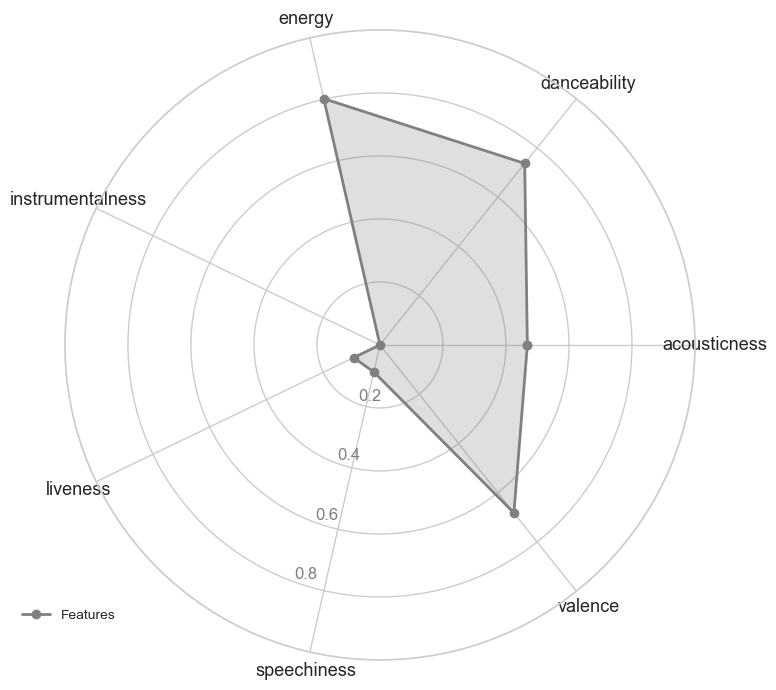

In [21]:
# Here is a polar chart BUT we may want to do a cluster chart
def feature_plot(features):
    labels= list(features)[:]
    stats= features.mean().tolist()

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    #Size of the figure
    fig=plt.figure(figsize = (18,18))

    ax = fig.add_subplot(221, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2, label = "Features", color= 'gray')
    ax.fill(angles, stats, alpha=0.25, facecolor='gray')
    ax.set_thetagrids(angles[0:7] * 180/np.pi, labels , fontsize = 13)


    ax.set_rlabel_position(250)
    plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
    plt.ylim(0,1)

    plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

# df_features is pull the audio features from positions     
feature_plot(df_features)

In [22]:
# To get more audio features

def get_features(track_id):
    track_features_x = sp.audio_features(track_id)
    dfx = pd.DataFrame(track_features_x, index=[0])
    dfx_features = dfx.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
    return dfx_features

# Insert a new Track ID // this is the song 'positions' by YTMIXEDIT
df2 = get_features('4TpeDaUZ1pcXClP9gIEgty')
df2


,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.948,0.702,0.221,0.00176,0.101,0.0571,0.961


In [23]:
# This is the song 'postions' by Ariana Grande
df_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.468,0.737,0.802,0,0.0931,0.0878,0.682


In [24]:
# list of headers 1 
list(df_features)[:]


['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'valence']

In [25]:
# list of headers 2 
list(df2)[:]

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'valence']

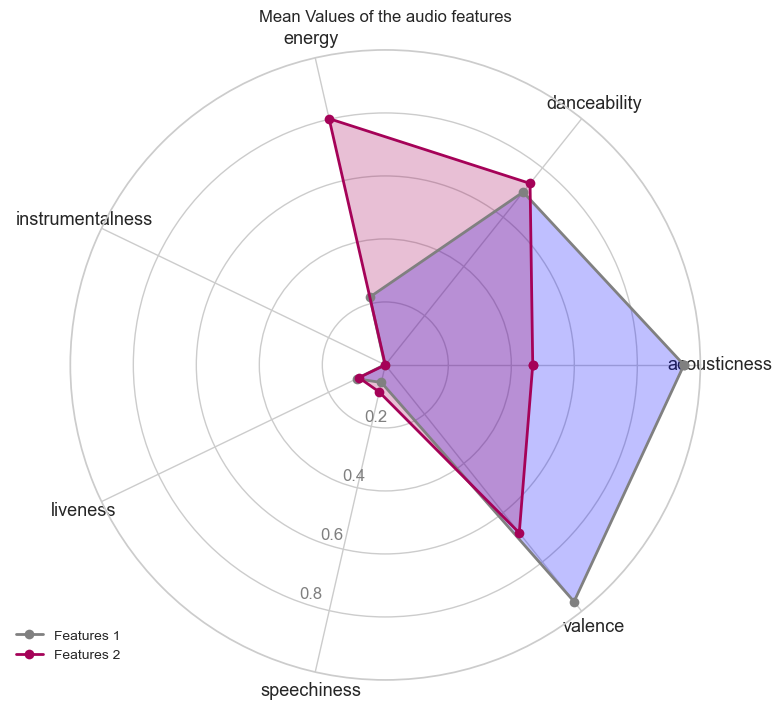

In [26]:
# Going to compare the two song's audio features

def feature_plot2(features1,features2):
    
    labels = list(features1)[:]
    stats = features1.mean().tolist()
    stats2 = features2.mean().tolist()

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)

    # close the plot
    stats = np.concatenate((stats,[stats[0]]))
    stats2 = np.concatenate((stats2,[stats2[0]])) 
    angles = np.concatenate((angles,[angles[0]]))

    #Size of the figure
    fig = plt.figure(figsize = (18,18))

    ax = fig.add_subplot(221, polar=True)
    ax.plot(angles, stats, 'o-', linewidth = 2, label = "Features 1", color = 'gray')
    ax.fill(angles, stats, alpha =0.25, facecolor ='blue')
    ax.set_thetagrids(angles[0:7] * 180/np.pi, labels , fontsize = 13)

    ax.set_rlabel_position(250)
    plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color ="grey", size =12)
    plt.ylim(0,1)

    ax.plot(angles, stats2, 'o-', linewidth = 2, label = "Features 2", color = 'm')
    ax.fill(angles, stats2, alpha = 0.25, facecolor ='m' )
    ax.set_title('Mean Values of the audio features')
    ax.grid(True)

    plt.legend(loc ='best', bbox_to_anchor =(0.1, 0.1))

# Plot the graph
feature_plot2(df2,df_features)

# Getting song recommendations based on song (uses Spotify API not ML)

In [44]:
import requests
import base64

In [45]:
def get_token(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET):
    url = "https://accounts.spotify.com/api/token"
    headers = {}
    data = {}
    message = f"{SPOTIPY_CLIENT_ID}:{SPOTIPY_CLIENT_SECRET}"
    messageBytes = message.encode('ascii')
    base64Bytes = base64.b64encode(messageBytes)
    base64Message = base64Bytes.decode('ascii')
    headers['Authorization'] = "Basic " + base64Message
    data['grant_type'] = "client_credentials"
    r = requests.post(url, headers=headers, data=data)
    token = r.json()['access_token']
    return token

In [46]:
token = get_token(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET)
song_id = "4BzIFYuujBQsdmELx5fUhA"

In [47]:
token

'BQA9ACLIBOLW-bJvA9KQsoCcQuyOCwR-iueBWFhzsFVxpy5Vt7eLwOvJfPCkT3tTyMwfPCjnujTTZ_YdKIRfLnOa5hvC1F76HOL7TNugr1ocsFUq8xeq'

In [48]:
def get_track_recommendations(seed_tracks,token):
    limit = 20
    recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={seed_tracks}"

    headers = {
        "Authorization": "Bearer " + token
    }

    res = requests.get(url=recUrl, headers=headers)
    return res.json()

In [49]:
json_response = get_track_recommendations(song_id,token)

In [50]:
json_response

{'tracks': [{'album': {'album_group': 'ALBUM',
    'album_type': 'ALBUM',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2y8Jo9CKhJvtfeKOsYzRdT'},
      'href': 'https://api.spotify.com/v1/artists/2y8Jo9CKhJvtfeKOsYzRdT',
      'id': '2y8Jo9CKhJvtfeKOsYzRdT',
      'name': 'Rod Stewart',
      'type': 'artist',
      'uri': 'spotify:artist:2y8Jo9CKhJvtfeKOsYzRdT'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
     'DM',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FJ',
     '

In [51]:
uris =[]
for i in json_response['tracks']:
    uris.append(i)
    print(f"\"{i['name']}\" by({i['artists'][0]['name']})")

"Da Ya Think I'm Sexy?" by(Rod Stewart)
"Do You Wanna Funk?" by(Patrick Cowley)
"Don Quichotte - No Estan Aqui" by(Magazine 60)
"Chain of Love" by(Silver Convention)
"Born to Be Alive - The Original" by(Patrick Hernandez)
"Spank - 12 " Version" by(Jimmy "Bo" Horne)
"Young Turks" by(Rod Stewart)
"Rock Your Baby" by(George McCrae)
"Love At First Sight" by(Van McCoy)
"What's Your Name, What's Your Number - Single Edit" by(Andrea True Connection)
"Disco Magic" by(T-Connection)
"Georgy Porgy" by(TOTO)
"AIN't THAT ENOUGH FOR YOU" by(John Davis & The Monster Orchestra)
"When Will I See You Again" by(The Three Degrees)
"Designer Music" by(Lipps Inc.)
"Love in a Sleeper" by(Silver Convention)
"Over And Over" by(Sylvester)
"Ooh I Love It (Love Break)" by(The Salsoul Orchestra)
"Megatron Man" by(Patrick Cowley)
"The Letter" by(Amii Stewart)


In [52]:
recolist = json_response['tracks']
print(len(recolist))

20


In [53]:
print(recolist)

[{'album': {'album_group': 'ALBUM', 'album_type': 'ALBUM', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2y8Jo9CKhJvtfeKOsYzRdT'}, 'href': 'https://api.spotify.com/v1/artists/2y8Jo9CKhJvtfeKOsYzRdT', 'id': '2y8Jo9CKhJvtfeKOsYzRdT', 'name': 'Rod Stewart', 'type': 'artist', 'uri': 'spotify:artist:2y8Jo9CKhJvtfeKOsYzRdT'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'M

In [54]:
recolist[0]

{'album': {'album_group': 'ALBUM',
  'album_type': 'ALBUM',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2y8Jo9CKhJvtfeKOsYzRdT'},
    'href': 'https://api.spotify.com/v1/artists/2y8Jo9CKhJvtfeKOsYzRdT',
    'id': '2y8Jo9CKhJvtfeKOsYzRdT',
    'name': 'Rod Stewart',
    'type': 'artist',
    'uri': 'spotify:artist:2y8Jo9CKhJvtfeKOsYzRdT'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
 

In [55]:
recommendation_result = pd.DataFrame(recolist)
recommendation_result

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,331333,False,{'isrc': 'USWB10807926'},{'spotify': 'https://open.spotify.com/track/4z...,https://api.spotify.com/v1/tracks/4z7maGZkAonD...,4z7maGZkAonDlXlwo8q69f,False,Da Ya Think I'm Sexy?,71,https://p.scdn.co/mp3-preview/d7c9823901cd954e...,1,track,spotify:track:4z7maGZkAonDlXlwo8q69f
1,"{'album_group': 'COMPILATION', 'album_type': '...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,406053,False,{'isrc': 'CAU118200125'},{'spotify': 'https://open.spotify.com/track/03...,https://api.spotify.com/v1/tracks/03bPizm2zHjY...,03bPizm2zHjY4AdSR2SJpR,False,Do You Wanna Funk?,15,https://p.scdn.co/mp3-preview/e41528ed240533b5...,6,track,spotify:track:03bPizm2zHjY4AdSR2SJpR
2,"{'album_group': 'COMPILATION', 'album_type': '...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,207095,False,{'isrc': 'FRG791000030'},{'spotify': 'https://open.spotify.com/track/5Q...,https://api.spotify.com/v1/tracks/5Q3ZwSU1Pods...,5Q3ZwSU1Pods1gs6SYJPmG,False,Don Quichotte - No Estan Aqui,42,https://p.scdn.co/mp3-preview/a257e4fd2b1ff8fc...,1,track,spotify:track:5Q3ZwSU1Pods1gs6SYJPmG
3,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,247973,False,{'isrc': 'US78T0748133'},{'spotify': 'https://open.spotify.com/track/1N...,https://api.spotify.com/v1/tracks/1NtQGtr44WwZ...,1NtQGtr44WwZhnwczTdxAO,False,Chain of Love,2,https://p.scdn.co/mp3-preview/48010eeeb8b65bfa...,2,track,spotify:track:1NtQGtr44WwZhnwczTdxAO
4,"{'album_group': 'SINGLE', 'album_type': 'SINGL...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,188133,False,{'isrc': 'FRX957900007'},{'spotify': 'https://open.spotify.com/track/3X...,https://api.spotify.com/v1/tracks/3XIEWK1V9n25...,3XIEWK1V9n25PS9Vb6axj5,False,Born to Be Alive - The Original,71,https://p.scdn.co/mp3-preview/5898691af1ed6722...,1,track,spotify:track:3XIEWK1V9n25PS9Vb6axj5
5,"{'album_group': 'COMPILATION', 'album_type': '...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,418800,False,{'isrc': 'NL-P43-10-50404'},{'spotify': 'https://open.spotify.com/track/1u...,https://api.spotify.com/v1/tracks/1uoFwurhS62G...,1uoFwurhS62GOfTz2AbjYJ,False,"Spank - 12 "" Version",40,https://p.scdn.co/mp3-preview/edc0caa23173f38a...,6,track,spotify:track:1uoFwurhS62GOfTz2AbjYJ
6,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,303333,False,{'isrc': 'USWB10807934'},{'spotify': 'https://open.spotify.com/track/6s...,https://api.spotify.com/v1/tracks/6sBA8b9bT8Z8...,6sBA8b9bT8Z8G8TkVDvNTK,False,Young Turks,52,https://p.scdn.co/mp3-preview/f7a81c78c88c754d...,9,track,spotify:track:6sBA8b9bT8Z8G8TkVDvNTK
7,"{'album_group': 'COMPILATION', 'album_type': '...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, FR, MC]",1,386226,False,{'isrc': 'FR6V82353146'},{'spotify': 'https://open.spotify.com/track/36...,https://api.spotify.com/v1/tracks/361d701cQtW0...,361d701cQtW0Qsj6zITxmv,False,Rock Your Baby,5,https://p.scdn.co/mp3-preview/e9aa12b6502fb67d...,7,track,spotify:track:361d701cQtW0Qsj6zITxmv
8,"{'album_group': 'COMPILATION', 'album_type': '...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CL, CO, CR, CY, C...",1,270122,False,{'isrc': 'USAR49911009'},{'spotify': 'https://open.spotify.com/track/0a...,https://api.spotify.com/v1/tracks/0aztbceRE98n...,0aztbceRE98nSrNEY3obkU,False

In [56]:
features_df1 = pd.DataFrame()
for name in recommendation_result['name'].iteritems():
    track_name = name[1]
    audio_features = sp.audio_features(track_name)
    local_features = pd.DataFrame(audio_features, index=[0])
    features_df1 = features_df1.append(local_features)

SpotifyException: http status: 400, code:-1 - Unsupported URL / URI., reason: None

In [ ]:
features_df1

In [57]:
features_df = pd.DataFrame()
for id in recommendation_result['id'].iteritems():
    track_id = id[1]
    audio_features = sp.audio_features(track_id)
    local_features = pd.DataFrame(audio_features, index=[0])
    features_df = features_df.append(local_features)

C:\Users\camer\AppData\Local\Temp\ipykernel_15872\4293700090.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(local_features)
C:\Users\camer\AppData\Local\Temp\ipykernel_15872\4293700090.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(local_features)
C:\Users\camer\AppData\Local\Temp\ipykernel_15872\4293700090.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(local_features)
C:\Users\camer\AppData\Local\Temp\ipykernel_15872\4293700090.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(local_featur

In [58]:
features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.715,0.689,2,-8.065,0,0.0290,0.014300,0.000192,0.1110,0.852,111.504,audio_features,4z7maGZkAonDlXlwo8q69f,spotify:track:4z7maGZkAonDlXlwo8q69f,https://api.spotify.com/v1/tracks/4z7maGZkAonD...,https://api.spotify.com/v1/audio-analysis/4z7m...,331333,4
0,0.791,0.696,6,-8.536,1,0.0343,0.001860,0.266000,0.1860,0.719,129.919,audio_features,03bPizm2zHjY4AdSR2SJpR,spotify:track:03bPizm2zHjY4AdSR2SJpR,https://api.spotify.com/v1/tracks/03bPizm2zHjY...,https://api.spotify.com/v1/audio-analysis/03bP...,406053,4
0,0.775,0.862,9,-6.945,0,0.0373,0.015200,0.327000,0.1860,0.867,118.782,audio_features,5Q3ZwSU1Pods1gs6SYJPmG,spotify:track:5Q3ZwSU1Pods1gs6SYJPmG,https://api.spotify.com/v1/tracks/5Q3ZwSU1Pods...,https://api.spotify.com/v1/audio-analysis/5Q3Z...,207096,4
0,0.353,0.449,7,-12.537,1,0.0317,0.104000,0.000134,0.0871,0.746,92.574,audio_features,1NtQGtr44WwZhnwczTdxAO,spotify:track:1NtQGtr44WwZhnwczTdxAO,https://api.spotify.com/v1/tracks/1NtQGtr44WwZ...,https://api.spotify.com/v1/audio-analysis/1NtQ...,247973,4
0,0.704,0.868,2,-5.808,1,0.0315,0.083400,0.000000,0.2060,0.808,131.468,audio_features,3XIEWK1V9n25PS9Vb6axj5,spotify:track:3XIEWK1V9n25PS9Vb6axj5,https://api.spotify.com/v1/tracks/3XIEWK1V9n25...,https://api.spotify.com/v1/audio-analysis/3XIE...,188133,4
0,0.782,0.601,5,-11.234,1,0.0526,0.003560,0.005610,0.0466,0.842,118.077,audio_features,1uoFwurhS62GOfTz2AbjYJ,spotify:track:1uoFwurhS62GOfTz2AbjYJ,https://api.spotify.com/v1/tracks/1uoFwurhS62G...,https://api.spotify.com/v1/audio-analysis/1uoF...,418800,4
0,0.625,0.844,0,-7.566,0,0.0316,0.271000,0.390000,0.1050,0.722,160.719,audio_features,6sBA8b9bT8Z8G8TkVDvNTK,spotify:track:6sBA8b9bT8Z8G8TkVDvNTK,https://api.spotify.com/v1/tracks/6sBA8b9bT8Z8...,https://api.spotify.com/v1/audio-analysis/6sBA...,303333,4
0,0.579,0.686,5,-17.412,0,0.0378,0.167000,0.214000,0.0810,0.932,105.073,audio_features,361d701cQtW0Qsj6zITxmv,spotify:track:361d701cQtW0Qsj6zITxmv,https://api.spotify.com/v1/tracks/361d701cQtW0...,https://api.spotify.com/v1/audio-analysis/361d...,386227,4
0,0.585,0.878,10,-9.154,1,0.0402,0.165000,0.800000,0.1020,0.715,112.914,audio_features,0aztbceRE98nSrNEY3obkU,spotify:track:0aztbceRE98nSrNEY3obkU,https://api.spotify.com/v1/tracks/0aztbceRE98n...,https://api.spotify.com/v1/audio-analysis/0azt...,270123,4
0,0.752,0.702,11,-11.834,0,0.0502,0.029500,0.004640,0.0521,0.832,114.028,audio_features,7aIIYwXBtIMeGSxNGEQhyA,spotify:track:7aIIYwXBtIMeGSxNGEQhyA,https://api.spotify.com/v1/tracks/7aIIYwXBtIMe...,https://api.spotify.com/v1/audio-analysis/7aII...,196800,4


In [59]:
reduced_feature_df = features_df[["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]]
reduced_feature_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.715,0.689,2,-8.065,0,0.0290,0.01430,0.000192,0.1110,0.852,111.504
0,0.791,0.696,6,-8.536,1,0.0343,0.00186,0.266000,0.1860,0.719,129.919
0,0.775,0.862,9,-6.945,0,0.0373,0.01520,0.327000,0.1860,0.867,118.782
0,0.353,0.449,7,-12.537,1,0.0317,0.10400,0.000134,0.0871,0.746,92.574
0,0.704,0.868,2,-5.808,1,0.0315,0.08340,0.000000,0.2060,0.808,131.468


In [60]:
cluster_feature = pd.get_dummies(reduced_feature_df, columns=['danceability', 'energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness',"valence","tempo"])

In [61]:
model = KMeans(n_clusters=3)

In [62]:
model.fit(cluster_feature)

KMeans(n_clusters=3)

In [63]:
music_cluster = model.predict(cluster_feature)
music_cluster

array([0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1])

In [64]:
reduced_feature_df["clusters"] = music_cluster
reduced_feature_df

C:\Users\camer\AppData\Local\Temp\ipykernel_15872\4136206708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_feature_df["clusters"] = music_cluster


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
0,0.715,0.689,2,-8.065,0,0.0290,0.014300,0.000192,0.1110,0.852,111.504,0
0,0.791,0.696,6,-8.536,1,0.0343,0.001860,0.266000,0.1860,0.719,129.919,1
0,0.775,0.862,9,-6.945,0,0.0373,0.015200,0.327000,0.1860,0.867,118.782,0
0,0.353,0.449,7,-12.537,1,0.0317,0.104000,0.000134,0.0871,0.746,92.574,1
0,0.704,0.868,2,-5.808,1,0.0315,0.083400,0.000000,0.2060,0.808,131.468,1
0,0.782,0.601,5,-11.234,1,0.0526,0.003560,0.005610,0.0466,0.842,118.077,2
0,0.625,0.844,0,-7.566,0,0.0316,0.271000,0.390000,0.1050,0.722,160.719,0
0,0.579,0.686,5,-17.412,0,0.0378,0.167000,0.214000,0.0810,0.932,105.073,0
0,0.585,0.878,10,-9.154,1,0.0402,0.165000,0.800000,0.1020,0.715,112.914,1
0,0.752,0.702,11,-11.834,0,0.0502,0.029500,0.004640,0.0521,0.832,114.028,0


C:\Users\camer\AppData\Local\Temp\ipykernel_15872\231296035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_feature_df["name"] = recommendation_result["name"]


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters,name
0,0.715,0.689,2,-8.065,0,0.0290,0.014300,0.000192,0.1110,0.852,111.504,0,Da Ya Think I'm Sexy?
0,0.791,0.696,6,-8.536,1,0.0343,0.001860,0.266000,0.1860,0.719,129.919,1,Da Ya Think I'm Sexy?
0,0.775,0.862,9,-6.945,0,0.0373,0.015200,0.327000,0.1860,0.867,118.782,0,Da Ya Think I'm Sexy?
0,0.353,0.449,7,-12.537,1,0.0317,0.104000,0.000134,0.0871,0.746,92.574,1,Da Ya Think I'm Sexy?
0,0.704,0.868,2,-5.808,1,0.0315,0.083400,0.000000,0.2060,0.808,131.468,1,Da Ya Think I'm Sexy?
0,0.782,0.601,5,-11.234,1,0.0526,0.003560,0.005610,0.0466,0.842,118.077,2,Da Ya Think I'm Sexy?
0,0.625,0.844,0,-7.566,0,0.0316,0.271000,0.390000,0.1050,0.722,160.719,0,Da Ya Think I'm Sexy?
0,0.579,0.686,5,-17.412,0,0.0378,0.167000,0.214000,0.0810,0.932,105.073,0,Da Ya Think I'm Sexy?
0,0.585,0.878,10,-9.154,1,0.0402,0.165000,0.800000,0.1020,0.715,112.914,1,Da Ya Think I'm Sexy?
0,0.752,0.702,11,-11.834,0,0.0502,0.029500,0.004640,0.0521,0.832,114.028,0,Da Ya Think I'm Sexy?


# base

In [43]:
track_data = sp.search(q='track:'+'shape',type='track', limit=100)

HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'track:shape', 'limit': 100, 'offset': 0, 'type': 'track', 'market': None} returned 400 due to Invalid limit


SpotifyException: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=track%3Ashape&limit=100&offset=0&type=track:
 Invalid limit, reason: None

In [ ]:
track_data

In [ ]:
track_result = []
for i, item in enumerate(track_data['tracks']['items']):
    track = item['album']
    track_id = item['id']
    track_name = item['name']
    popularity = item['popularity']
    track_result.append((i, track['artists'][0]['name'], track['name'], track_id, track_name, track['release_date'], popularity))

In [ ]:
track_result

In [ ]:
track_df = pd.DataFrame(track_result, index=None, columns=('Item', 'Artist', 'Album Name', 'Id', 'Song Name', 'Release Date', 'Popularity'))

In [ ]:
track_df

In [ ]:
features_df = pd.DataFrame()
for id in track_df['Id'].iteritems():
    track_id = id[1]
    audio_features = sp.audio_features(track_id)
    local_features = pd.DataFrame(audio_features, index=[0])
    features_df = features_df.append(local_features)

In [ ]:
features_df

In [ ]:
final_df = track_df.merge(features_df, left_on="Id", right_on="id")

In [ ]:
final_df

In [ ]:
features_df.shape

In [ ]:
final_df_sorted = final_df.sort_values(by=['Popularity'], ascending=False)

In [ ]:
final_df_sorted

In [ ]:
final_df_sorted.dtypes

In [ ]:
new_df = final_df_sorted[["danceability","energy","key","loudness","mode","speechiness","acousticness","liveness"]]
new_df

In [ ]:
#1: find top 1000-more songs by genre
#2: Filter by dropdowns (genre)
#3: Potentially second drop down by song
#4: Select song from cluster where user picks




In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(new_df)

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(scaled_df)
visualizer.show()

In [ ]:
feature_name = "liveness"

In [ ]:
df_plot = final_df_sorted[['Artist', 'Album Name', 'Song Name', 'Release Date', 'Popularity', f'{feature_name}']]

In [ ]:
df_plot

In [ ]:
df_new = df_plot[["Popularity","liveness"]]
df_new

In [ ]:
df_new["liveness"].astype(float)

In [ ]:
df_new

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_new)

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(scaled_df)
visualizer.show()